### 学习Andrew的ML入门课程的coding笔记 

下面简单模拟GD算法在单变量线性回归模型中的使用

Train time : 0  w : 1.3855555555555554  b : 0.09444444444444444 cost : 42.06364259259257
Train time : 10  w : 0.892297372510098  b : 0.17908182289796098 cost : 5.324226390257099
Train time : 20  w : 0.7664458553527458  b : 0.28190511611895275 cost : 3.0020324816101955
The final line is 0.711034101633201x + 0.37477966621706266
The final cost is 2.7701800847894713
The total time cost is : 0.0019865036010742188


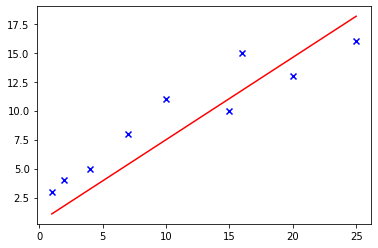

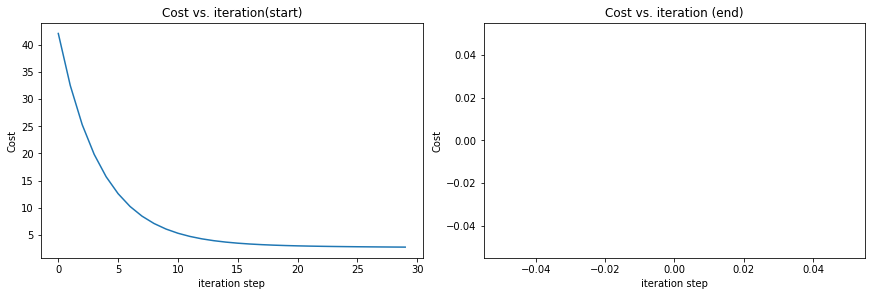

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
x = np.array([1,2,4,7,10,15,16,20,25])
y = np.array([3,4,5,8,11,10,15,13,16])
plt.scatter(x,y,marker='x',c='b')
# plt.show()

def cost_func(w,b,x,y):
    n = x.shape[0]
    cost = 0
    for i in range(n):
        cost += (w*x[i]+b-y[i])**2
    cost /= (2*n)
    return cost

def derivative_w(w,b,x,y):
    n = x.shape[0]
    val_w = 0
    for i in range(n):
        val_w += x[i]*(w*x[i]+b-y[i])
    val_w /= n
    # print(val_w)
    return val_w

def derivative_b(w,b,x,y):
    n = x.shape[0]
    val_b = 0
    for i in range(n):
        val_b += (w*x[i]+b-y[i])
    val_b /= n
    return val_b

## BGD algorithm
def change_parameter(x,y,cost_hist,w=0,b=0,lr=0.1,train_times=10):
    cost = cost_func(w,b,x,y)
    for epoch in range(train_times):
        der_w,der_b = derivative_w(w,b,x,y),derivative_b(w,b,x,y)
        w = w - lr * der_w
        b = b - lr * der_b
        cost = cost_func(w,b,x,y)
        cost_hist.append(cost)

        if epoch % 10 == 0 :
            print("Train time : "+ str(epoch) , " w : " + str(w) , " b : " + str(b) + " cost : " + str(cost))
    return (w,b)

start = time.time()
cost_hist = []
w,b = change_parameter(x,y,cost_hist,w=0,b=0,lr=0.01,train_times=30)
print("The final line is " + str (w) + "x + " + str(b))
cost = cost_func(w,b,x,y)
print("The final cost is " + str(cost))
xx = np.linspace(1, 25, 50)
yy = w*xx + b

end = time.time()
print("The total time cost is : " + str(end-start))

plt.plot(xx,yy,color='red')
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(cost_hist[:100])
ax2.plot(1000 + np.arange(len(cost_hist[1000:])), cost_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()


使用了简单的GD算法进行模型的训练，其中循环的终止条件有多种，这里借鉴了lab里面用循环次数作为终止条件比较好看，也绘制了cost曲线来追踪模型的训练过程。

下面使用kaggle上的数据集进行训练 lr降低了好多才防止了发散 用了批量GD 速度比较慢  epoch为100 batch为700

Train time : 0  w : 0.4165209450891801  b : 0.006238951057021424 cost : 569.5714437935256
Train time : 10  w : 0.9961143375934723  b : 0.014884070688671718 cost : 3.958309503990747
Train time : 20  w : 0.9987422324817409  b : 0.014881132244676291 cost : 3.946686097410925
Train time : 30  w : 0.9987547758060816  b : 0.014839005849066006 cost : 3.946684426544642
Train time : 40  w : 0.9987554636946798  b : 0.014796715010087183 cost : 3.9466829953738767
Train time : 50  w : 0.9987560976455788  b : 0.014754436614921589 cost : 3.946681565104601
Train time : 60  w : 0.9987567311543514  b : 0.014712171461256656 cost : 3.9466801357313464
Train time : 70  w : 0.9987573644635519  b : 0.01466991954857757 cost : 3.9466787072535485
Train time : 80  w : 0.9987579975743417  b : 0.014627680872752614 cost : 3.9466772796706424
Train time : 90  w : 0.9987586304867879  b : 0.01458545542963496 cost : 3.9466758529820813
The final line is 0.9987591999384571x + 0.01454746384136746
The final cost is 3.94667456

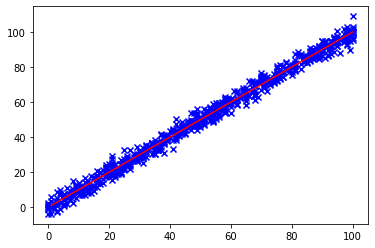

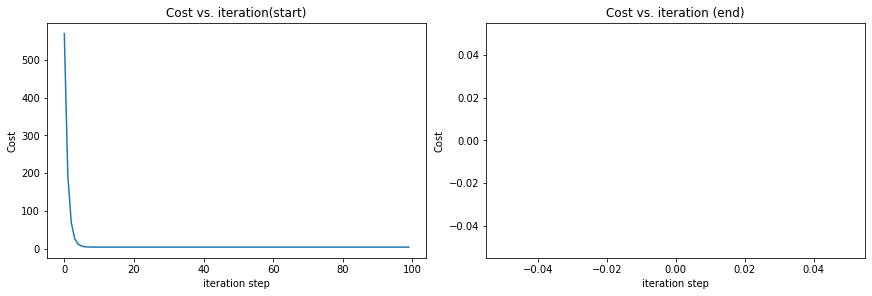

In [13]:
import numpy as np
filename = 'lecture1\\train.csv'

with open(filename,'rt',encoding='UTF-8')as raw_data:
    data=np.loadtxt(raw_data,delimiter=',')

# print(data)
# print(data.shape)
x = data[:,0]
y = data[:,1]
plt.scatter(x,y,marker='x',c='b')
# plt.show()

start = time.time()
cost_hist = []
w,b = change_parameter(x,y,cost_hist,w=0,b=0,lr=0.000125,train_times=100)
print("The final line is " + str (w) + "x + " + str(b))
cost = cost_func(w,b,x,y)
print("The final cost is " + str(cost))
xx = np.linspace(1, 100, 50)
yy = w*xx + b

end = time.time()
print("The total time cost is : " + str(end-start))

plt.plot(xx,yy,color='red')
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(cost_hist[:100])
ax2.plot(1000 + np.arange(len(cost_hist[1000:])), cost_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()



下面使用SGD算法 提升速度 看看效果

Train time : 0  w : 0.722318249088  b : 0.0090289781136 cost : 131.47469818997516
The final line is 0.997078355987305x + 0.009181071611738445
The final cost is 3.951671461140082
The total time cost is : 0.03800654411315918


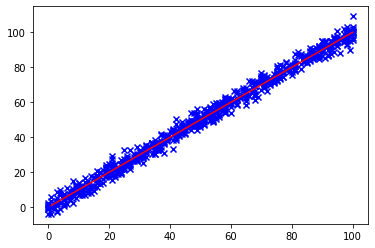

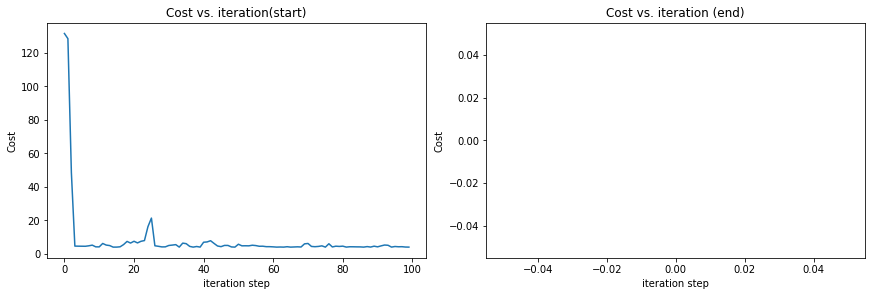

In [59]:
def mini_derivative_w(w,b,i):
    return x[i]*(w*x[i]+b-y[i])

def mini_derivative_b(w,b,i):
    return w*x[i]+b-y[i]


def SGD(x,y,cost_hist,w=0,b=0,lr=0.1,train_times=1000):
    cost = cost_func(w,b,x,y)
    n = x.shape[0]
    for epoch in range(train_times):
        ran_i = np.random.randint(low=0,high=n)
        der_w,der_b = mini_derivative_w(w,b,ran_i),mini_derivative_b(w,b,ran_i)
        w = w - lr * der_w
        b = b - lr * der_b
        cost = cost_func(w,b,x,y)
        cost_hist.append(cost)
        if epoch % 500 == 0 :
            print("Train time : "+ str(epoch) , " w : " + str(w) , " b : " + str(b) + " cost : " + str(cost))
    return (w,b)

x = data[:,0]
y = data[:,1]
plt.scatter(x,y,marker='x',c='b')

start = time.time()
cost_hist = []
w,b = SGD(x,y,cost_hist,w=0,b=0,lr=0.00012,train_times=100)
print("The final line is " + str (w) + "x + " + str(b))
cost = cost_func(w,b,x,y)
print("The final cost is " + str(cost))
xx = np.linspace(1, 100, 50)
yy = w*xx + b

end = time.time()
print("The total time cost is : " + str(end-start))

plt.plot(xx,yy,color='red')
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(cost_hist[:100])
ax2.plot(1000 + np.arange(len(cost_hist[1000:])), cost_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()


In [60]:
import random

最后使用mini BGD算法进行测试  由于是小批量的训练 batch选择是10  其中用了np.random.choice进行数组抽样

Train time : 0  w : 0.1598027791735056  b : 0.004154549831735401 cost : 1178.2526463420095
Train time : 10  w : 0.9826933202598441  b : 0.015650621714516876 cost : 4.376311768871771
Train time : 20  w : 0.9768331803364303  b : 0.01598300719449392 cost : 4.746951864052578
Train time : 30  w : 0.9905450062774026  b : 0.01600253958509712 cost : 4.058662096827684
Train time : 40  w : 0.9950036898753709  b : 0.016013356833723267 cost : 3.969974080878805
Train time : 50  w : 1.0065970856907105  b : 0.016282981600326714 cost : 4.049867138109434
Train time : 60  w : 1.0100233009500057  b : 0.01627271076006865 cost : 4.159309196355831
Train time : 70  w : 0.9981101847480613  b : 0.01602771622864187 cost : 3.947380453451101
Train time : 80  w : 0.9971109689817668  b : 0.015835486355231188 cost : 3.951144415983496
Train time : 90  w : 1.0004405277934723  b : 0.01566559935829695 cost : 3.9515206943860637
The final line is 1.0010728956409107x + 0.01567143173606193
The final cost is 3.95576997787715

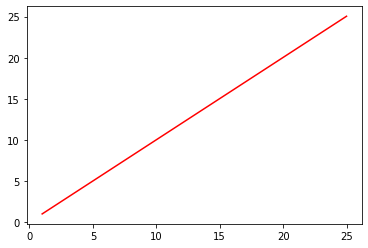

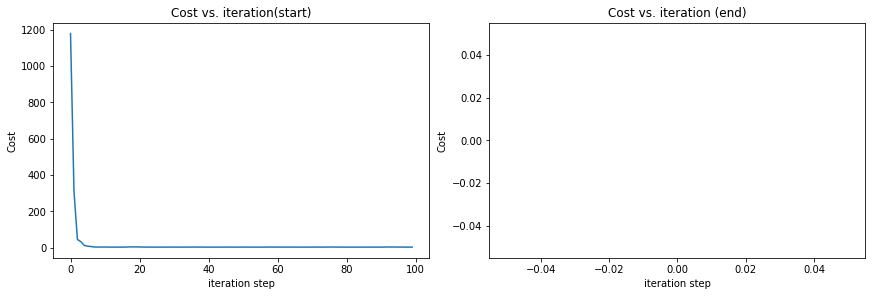

In [61]:
def derivative_w_mini(w,b,x,y,batch):
    val_w = 0
    for i in range(batch):
        val_w += x[i]*(w*x[i]+b-y[i])
    val_w /= batch
    return val_w

def derivative_b_mini(w,b,x,y,batch):
    val_b = 0
    for i in range(batch):
        val_b += (w*x[i]+b-y[i])
    val_b /= batch
    return val_b

def mini_BGD(x,y,cost_hist,w=0,b=0,lr=0.1,train_times=10,batch = 128):
    cost = cost_func(w,b,x,y)
    for epoch in range(train_times):
        slice = np.random.choice(x.shape[0],batch,replace=False)
        ran_x = x[slice]
        ran_y = y[slice]
        der_w,der_b = derivative_w_mini(w,b,ran_x,ran_y,batch=batch),derivative_b_mini(w,b,ran_x,ran_y,batch=batch)
        w = w - lr * der_w
        b = b - lr * der_b
        cost = cost_func(w,b,x,y)
        cost_hist.append(cost)
        if epoch % 10 == 0 :
            print("Train time : "+ str(epoch) , " w : " + str(w) , " b : " + str(b) + " cost : " + str(cost))
    return (w,b)

start = time.time()
cost_hist = []
w,b = mini_BGD(x,y,cost_hist,w=0,b=0,lr=0.000138,train_times=100,batch=10)
print("The final line is " + str (w) + "x + " + str(b))
cost = cost_func(w,b,x,y)
print("The final cost is " + str(cost))
xx = np.linspace(1, 25, 50)
yy = w*xx + b

end = time.time()
print("The total time cost is : " + str(end-start))

plt.plot(xx,yy,color='red')
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(cost_hist[:100])
ax2.plot(1000 + np.arange(len(cost_hist[1000:])), cost_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

至此 GD算法的基本模型已经比较熟练

In [6]:
import numpy as np
a = np.array([1,2])
b = np.array([1,2])
c = a@b
d = np.dot(a,b)
print(c==d)
print(a.dtype)
print(np.mean(a))
print(a**2)

e = np.arange(6).reshape(2,-1)  # -1 的作用是自动计算
print(e)

True
int32
1.5
[1 4]
[[0 1 2]
 [3 4 5]]
